# Aula 4 exercício 3

In [2]:
import pandas as pd

In [3]:
numeros = [i for i in range(11)]
letras = [chr(i + 65) for i in range(11)]
nome_coluna = ['N']

df = pd.DataFrame(data = numeros, index = letras, columns = nome_coluna)

In [4]:
selecao = df['N'].isin([i for i in range(11) if i % 2 == 0])
df = df[selecao]
df

,N
A,0
C,2
E,4
G,6
I,8
K,10


# Aula 05 exercício 03

In [5]:
import pandas as pd
alunos = pd.DataFrame({'Nome': ['Ary', 'Cátia', 'Denis', 'Beto', 'Bruna', 'Dara', 'Carlos', 'Alice'], 
                        'Sexo': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'], 
                        'Idade': [15, 27, 56, 32, 42, 21, 19, 35], 
                        'Notas': [7.5, 2.5, 5.0, 10, 8.2, 7, 6, 5.6], 
                        'Aprovado': [True, False, False, True, True, True, False, False]}, 
                        columns = ['Nome', 'Idade', 'Sexo', 'Notas', 'Aprovado'])
alunos

,Nome,Idade,Sexo,Notas,Aprovado
0,Ary,15,M,7.5,True
1,Cátia,27,F,2.5,False
2,Denis,56,M,5.0,False
3,Beto,32,M,10.0,True
4,Bruna,42,F,8.2,True
5,Dara,21,F,7.0,True
6,Carlos,19,M,6.0,False
7,Alice,35,F,5.6,False


In [6]:
#selecionando os aprovados
selecao = alunos.Aprovado == True
aprovados = alunos[selecao]
aprovados

,Nome,Idade,Sexo,Notas,Aprovado
0,Ary,15,M,7.5,True
3,Beto,32,M,10.0,True
4,Bruna,42,F,8.2,True
5,Dara,21,F,7.0,True


In [7]:
#selecionando alunAs aprovadas
selecao = (alunos.Aprovado == True) & (alunos.Sexo == 'F')
aprovadas = alunos[selecao]
aprovadas

,Nome,Idade,Sexo,Notas,Aprovado
4,Bruna,42,F,8.2,True
5,Dara,21,F,7.0,True


In [8]:
#selecionando alunos com idade entre 10 e 20 anos ou com idade maior ou igual a 40 anos
selecao = ((alunos.Idade >=10) & (alunos.Idade <= 20)) | (alunos.Idade >= 40)
grupos_idade = alunos[selecao]
grupos_idade

,Nome,Idade,Sexo,Notas,Aprovado
0,Ary,15,M,7.5,True
2,Denis,56,M,5.0,False
4,Bruna,42,F,8.2,True
6,Carlos,19,M,6.0,False


In [9]:
#Crie um DataFrame somente com os alunos reprovados e mantenha neste DataFrame apenas as 
#colunas Nome, Sexo e Idade, nesta ordem.
selecao = alunos['Aprovado'] == False
reprovados = alunos.loc[selecao, ['Nome', 'Sexo', 'Idade']]
reprovados

,Nome,Sexo,Idade
1,Cátia,F,27
2,Denis,M,56
6,Carlos,M,19
7,Alice,F,35


In [10]:
#teste 2

selecao = alunos['Aprovado'] == False
reprovados = alunos[['Nome', 'Sexo', 'Idade']][selecao]
reprovados

,Nome,Sexo,Idade
1,Cátia,F,27
2,Denis,M,56
6,Carlos,M,19
7,Alice,F,35


In [11]:

alunos.sort_values(by = ['Idade'], inplace = True)
alunos.iloc[:3]

,Nome,Idade,Sexo,Notas,Aprovado
0,Ary,15,M,7.5,True
6,Carlos,19,M,6.0,False
5,Dara,21,F,7.0,True


In [12]:

alunos.sort_values(by = ['Idade'], inplace = True)
alunos.iloc[3]

Nome        Cátia
Idade          27
Sexo            F
Notas         2.5
Aprovado    False
Name: 1, dtype: object

In [13]:

alunos.sort_values(by = ['Idade'], inplace = True)
alunos.iloc[1:3]

,Nome,Idade,Sexo,Notas,Aprovado
6,Carlos,19,M,6.0,False
5,Dara,21,F,7.0,True


# Aula 06 exercício 05

In [19]:
imoveis = pd.DataFrame([['Apartamento', None, 970, 68], 
                        ['Apartamento', 2000, 878, 112], 
                        ['Casa', 5000, None, 500], 
                        ['Apartamento', None, 1010, 170], 
                        ['Apartamento', 1500, 850, None], 
                        ['Casa', None, None, None], 
                        ['Apartamento', 2000, 878, None], 
                        ['Apartamento', 1550, None, 228], 
                        ['Apartamento', 2500, 880, 195]], 
                        columns = ['Tipo', 'Valor', 'Condominio', 'IPTU'])
imoveis

,Tipo,Valor,Condominio,IPTU
0,Apartamento,NaN,970.0,68.0
1,Apartamento,2000.0,878.0,112.0
2,Casa,5000.0,NaN,500.0
3,Apartamento,NaN,1010.0,170.0
4,Apartamento,1500.0,850.0,NaN
5,Casa,NaN,NaN,NaN
6,Apartamento,2000.0,878.0,NaN
7,Apartamento,1550.0,NaN,228.0
8,Apartamento,2500.0,880.0,195.0


In [20]:
#Elimina os registros que não apresentam a variável Valor
imoveis.dropna(subset = ['Valor'], inplace = True)
imoveis

,Tipo,Valor,Condominio,IPTU
1,Apartamento,2000.0,878.0,112.0
2,Casa,5000.0,NaN,500.0
4,Apartamento,1500.0,850.0,NaN
6,Apartamento,2000.0,878.0,NaN
7,Apartamento,1550.0,NaN,228.0
8,Apartamento,2500.0,880.0,195.0


In [21]:
#Elimina os imóveis do tipo Apartamento que não apresentam valor Condominio
selecao = (imoveis['Tipo'] == 'Apartamento') & (imoveis['Condominio'].isnull())
imoveis = imoveis[~selecao]
imoveis


,Tipo,Valor,Condominio,IPTU
1,Apartamento,2000.0,878.0,112.0
2,Casa,5000.0,NaN,500.0
4,Apartamento,1500.0,850.0,NaN
6,Apartamento,2000.0,878.0,NaN
8,Apartamento,2500.0,880.0,195.0


In [22]:
# Substitui os valores faltantes que restam nas variáveis Condominio e IPTU por zero:
imoveis = imoveis.fillna({'Condominio': 0, 'IPTU': 0})
imoveis


,Tipo,Valor,Condominio,IPTU
1,Apartamento,2000.0,878.0,112.0
2,Casa,5000.0,0.0,500.0
4,Apartamento,1500.0,850.0,0.0
6,Apartamento,2000.0,878.0,0.0
8,Apartamento,2500.0,880.0,195.0


In [23]:
#4) Reconstrói o índice do DataFrame resultante:
imoveis.index = range(imoveis.shape[0])
imoveis

,Tipo,Valor,Condominio,IPTU
0,Apartamento,2000.0,878.0,112.0
1,Casa,5000.0,0.0,500.0
2,Apartamento,1500.0,850.0,0.0
3,Apartamento,2000.0,878.0,0.0
4,Apartamento,2500.0,880.0,195.0


## Aula 06 - Exercício 07

In [25]:
atletas = pd.DataFrame([['Marcos', 9.62], ['Pedro', None], ['João', 9.69], 
                        ['Beto', 9.72], ['Sandro', None], ['Denis', 9.69], 
                        ['Ary', None], ['Carlos', 9.74]], 
                        columns = ['Corredor', 'Melhor Tempo'])
atletas

,Corredor,Melhor Tempo
0,Marcos,9.62
1,Pedro,NaN
2,João,9.69
3,Beto,9.72
4,Sandro,NaN
5,Denis,9.69
6,Ary,NaN
7,Carlos,9.74


In [26]:

atletas.fillna(atletas.mean())

,Corredor,Melhor Tempo
0,Marcos,9.620
1,Pedro,9.692
2,João,9.690
3,Beto,9.720
4,Sandro,9.692
5,Denis,9.690
6,Ary,9.692
7,Carlos,9.740


# Aula 7 exercício 03

In [1]:
#buscar o erro de execução
import pandas as pd
alunos = pd.DataFrame({'Nome': ['Ary', 'Cátia', 'Denis', 'Beto', 'Bruna', 'Dara', 'Carlos', 'Alice'], 
                        'Sexo': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'], 
                        'Idade': [15, 27, 56, 32, 42, 21, 19, 35], 
                        'Notas': [7.5, 2.5, 5.0, 10, 8.2, 7, 6, 5.6]}, 
                        columns = ['Nome', 'Idade', 'Sexo', 'Notas'])

In [2]:
alunos

,Nome,Idade,Sexo,Notas
0,Ary,15,M,7.5
1,Cátia,27,F,2.5
2,Denis,56,M,5.0
3,Beto,32,M,10.0
4,Bruna,42,F,8.2
5,Dara,21,F,7.0
6,Carlos,19,M,6.0
7,Alice,35,F,5.6


In [8]:
#opção a = variação da nota pela média
alunos['Notas-Média(Notas)'] = alunos['Notas'].apply(lambda x: x - alunos['Notas'].mean())
alunos.head()

,Nome,Idade,Sexo,Notas,Notas-Média(Notas)
0,Ary,15,M,7.5,1.025
1,Cátia,27,F,2.5,-3.975
2,Denis,56,M,5.0,-1.475
3,Beto,32,M,10.0,3.525
4,Bruna,42,F,8.2,1.725


In [13]:
# opçao b:
alunos['Faixa Etária'] = alunos['Idade'].apply(lambda x: 'Menor que 20 anos' if x < 20 
       else ('Entre 20 e 40 anos' if (x >= 20 and x <= 40) 
             else 'Maior que 40 anos'))
alunos

,Nome,Idade,Sexo,Notas,Notas-Média(Notas),Faixa Etária
0,Ary,15,M,7.5,1.025,Menor que 20 anos
1,Cátia,27,F,2.5,-3.975,Entre 20 e 40 anos
2,Denis,56,M,5.0,-1.475,Maior que 40 anos
3,Beto,32,M,10.0,3.525,Entre 20 e 40 anos
4,Bruna,42,F,8.2,1.725,Maior que 40 anos
5,Dara,21,F,7.0,0.525,Entre 20 e 40 anos
6,Carlos,19,M,6.0,-0.475,Menor que 20 anos
7,Alice,35,F,5.6,-0.875,Entre 20 e 40 anos


In [14]:
#opção c
alunos['Faixa Etária'] = alunos['Idade'].apply(lambda x: 'Menor que 20 anos' if x < 20
                                               elif ('Entre 20 e 40 anos' if (x >= 20 and x <= 40)#o erro está no uso do elif)
                                                     else 'Maior que 40 anos'))


SyntaxError: invalid syntax (<ipython-input-14-38e0959e837b>, line 3)

In [18]:
#opção d:

alunos['Notas-Média(Notas)'] =alunos.Notas - alunos.Notas.mean()
alunos

,Nome,Idade,Sexo,Notas,Notas-Média(Notas),Faixa Etária
0,Ary,15,M,7.5,1.025,Menor que 20 anos
1,Cátia,27,F,2.5,-3.975,Entre 20 e 40 anos
2,Denis,56,M,5.0,-1.475,Maior que 40 anos
3,Beto,32,M,10.0,3.525,Entre 20 e 40 anos
4,Bruna,42,F,8.2,1.725,Maior que 40 anos
5,Dara,21,F,7.0,0.525,Entre 20 e 40 anos
6,Carlos,19,M,6.0,-0.475,Menor que 20 anos
7,Alice,35,F,5.6,-0.875,Entre 20 e 40 anos


## Aula 7 exercício 07

In [61]:
#testando 5 moedas. c = CARA C = COROA
m1 = 'CCcCCccCCCccCcCccCcCcCCCcCCcccCCcCcCcCcccCCcCcccCc'
m2 = 'CCCCCccCccCcCCCCccCccccCccCccCCcCccCcCcCCcCccCccCc'
m3 = 'CccCCccCcCCCCCCCCCCcccCccCCCCCCccCCCcccCCCcCCcccCC'
m4 = 'cCCccCCccCCccCCccccCcCcCcCcCcCcCCCCccccCCCcCCcCCCC'
m5 = 'CCCcCcCcCcCCCcCCcCcCCccCcCCcccCccCCcCcCcCcCcccccCc'



In [62]:
#criando um DF em que constem o Tipo e a frequencia por moeda
dados= pd.DataFrame(index=['c','C'])
dados




""
c
C


In [63]:
dados['Faces'] = ['Cara', 'Coroa']

In [64]:
dados

,Faces
c,Cara
C,Coroa


In [65]:
#resposta A:

eventos = {'m1': m1, 
            'm2': m2, 
            'm3': m3, 
            'm4': m4, 
            'm5': m5} # criando um dicionário, mas não transformou a string em list
moedas = pd.DataFrame(eventos)
df = pd.DataFrame(data = ['Cara', 'Coroa'], 
                    index = ['c', 'C'], 
                    columns = ['Faces'])
for item in moedas:
    df = pd.concat([df, moedas[item].value_counts()], 
                    axis = 1)
df



ValueError: If using all scalar values, you must pass an index

In [66]:
#resposta B (correta)
eventos = {'m1': list(m1), 
            'm2': list(m2), 
            'm3': list(m3), 
            'm4': list(m4), 
            'm5': list(m5)}
moedas = pd.DataFrame(eventos)
df = pd.DataFrame(data = ['Cara', 'Coroa'], 
                    index = ['c', 'C'], 
                    columns = ['Faces'])
for item in moedas:
    df = pd.concat([df, moedas[item].value_counts()], 
                    axis = 1)
df

,Faces,m1,m2,m3,m4,m5
c,Cara,25,26,19,23,25
C,Coroa,25,24,31,27,25


In [67]:
# resposta C
eventos = {'m1': list(m1), 
            'm2': list(m2), 
            'm3': list(m3), 
            'm4': list(m4), 
            'm5': list(m5)}
moedas = pd.DataFrame(eventos)
df = pd.DataFrame(data = ['Cara', 'Coroa'], 
                    index = ['c', 'C'], 
                    columns = ['Faces'])
for item in moedas:
    df = pd.concat([df, moedas[item].sum()], #Alternativa errada! O método sum() gera uma concatenação quando aplicado em variáveis tipo string.
                    axis = 1)
df

TypeError: cannot concatenate object of type '<class 'str'>'; only Series and DataFrame objs are valid

In [68]:
#resposta D
eventos = {'m1': list(m1), 
            'm2': list(m2), 
            'm3': list(m3), 
            'm4': list(m4), 
            'm5': list(m5)}
moedas = pd.DataFrame(eventos)
for item in moedas:
    df1 = pd.concat([df, moedas[item].value_counts()], 
                    axis = 1)
df1 #DF não foi previamente definido

,Faces,m5
c,Cara,25
C,Coroa,25


# Aula 8

## Exercício 03

In [71]:
import pandas as pd
alunos = pd.DataFrame({'Nome': ['Ary', 'Cátia', 'Denis', 'Beto', 'Bruna', 'Dara', 'Carlos', 'Alice'], 
                        'Sexo': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'], 
                        'Idade': [15, 27, 56, 32, 42, 21, 19, 35], 
                        'Notas': [7.5, 2.5, 5.0, 10, 8.2, 7, 6, 5.6], 
                        'Aprovado': [True, False, False, True, True, True, False, False]}, 
                        columns = ['Nome', 'Idade', 'Sexo', 'Notas', 'Aprovado'])
alunos

,Nome,Idade,Sexo,Notas,Aprovado
0,Ary,15,M,7.5,True
1,Cátia,27,F,2.5,False
2,Denis,56,M,5.0,False
3,Beto,32,M,10.0,True
4,Bruna,42,F,8.2,True
5,Dara,21,F,7.0,True
6,Carlos,19,M,6.0,False
7,Alice,35,F,5.6,False


In [72]:
notas_medias = alunos.groupby('Sexo')

In [73]:
notas_medias


In [74]:

sexo = alunos.groupby('Sexo')
sexo = pd.DataFrame(sexo['Notas'].mean().round(2))
sexo.columns = ['Notas Médias']
sexo

,Notas Médias
Sexo,
F,5.82
M,7.12


## Exercício 05

In [75]:
precos = pd.DataFrame([['Feira', 'Cebola', 2.5], 
                        ['Mercado', 'Cebola', 1.99], 
                        ['Supermercado', 'Cebola', 1.69], 
                        ['Feira', 'Tomate', 4], 
                        ['Mercado', 'Tomate', 3.29], 
                        ['Supermercado', 'Tomate', 2.99], 
                        ['Feira', 'Batata', 4.2], 
                        ['Mercado', 'Batata', 3.99], 
                        ['Supermercado', 'Batata', 3.69]], 
                        columns = ['Local', 'Produto', 'Preço'])
precos

,Local,Produto,Preço
0,Feira,Cebola,2.50
1,Mercado,Cebola,1.99
2,Supermercado,Cebola,1.69
3,Feira,Tomate,4.00
4,Mercado,Tomate,3.29
5,Supermercado,Tomate,2.99
6,Feira,Batata,4.20
7,Mercado,Batata,3.99
8,Supermercado,Batata,3.69


In [77]:
produtos = precos.groupby('Produto')
produtos.describe().round(2)

Preço                                         
        count  mean   std   min   25%   50%   75%  max
Produto                                               
Batata    3.0  3.96  0.26  3.69  3.84  3.99  4.10  4.2
Cebola    3.0  2.06  0.41  1.69  1.84  1.99  2.24  2.5
Tomate    3.0  3.43  0.52  2.99  3.14  3.29  3.64  4.0

In [79]:
#não arredonda
estatisticas = ['mean', 'std', 'min', 'max']
nomes = {'mean': 'Média', 'std': 'Desvio Padrão', 'min': 'Mínimo', 'max': 'Máximo'}
produtos['Preço'].aggregate(estatisticas).rename(columns = nomes)

,Média,Desvio Padrão,Mínimo,Máximo
Produto,,,,
Batata,3.960000,0.256320,3.69,4.2
Cebola,2.060000,0.409512,1.69,2.5
Tomate,3.426667,0.518684,2.99,4.0


In [81]:
#arredondando
estatisticas = ['mean', 'std', 'min', 'max']
nomes = {'mean': 'Média', 'std': 'Desvio Padrão', 
    'min': 'Mínimo', 'max': 'Máximo'}
produtos['Preço'].aggregate(estatisticas).rename(columns = nomes).round(2)

,Média,Desvio Padrão,Mínimo,Máximo
Produto,,,,
Batata,3.96,0.26,3.69,4.2
Cebola,2.06,0.41,1.69,2.5
Tomate,3.43,0.52,2.99,4.0


In [83]:
estatisticas = ['mean', 'devp', 'min', 'max'] #desvio padrão é std e não devp
nomes = {'mean': 'Média', 'devp': 'Desvio Padrão', 
    'min': 'Mínimo', 'max': 'Máximo'}
produtos['Preço'].aggregate(estatisticas).rename(columns = nomes).round(2)

AttributeError: 'SeriesGroupBy' object has no attribute 'devp'

# Aula 9

In [85]:
amostra = pd.read_csv('dados/aluguel_amostra.csv', sep=';')
amostra

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
9995,Apartamento,Copacabana,3,1,2,160,15500.0,1600.0,435.0,96.88,Apartamento
9996,Apartamento,Copacabana,4,0,0,190,6000.0,1000.0,0.0,31.58,Apartamento
9997,Apartamento,Barra da Tijuca,2,1,1,70,2800.0,750.0,160.0,40.00,Apartamento
9998,Apartamento,Tijuca,1,0,0,50,1700.0,360.0,20.0,34.00,Apartamento


In [86]:
#gerando uma Series
valor = amostra['Valor m2']

#calculando as variáveis conforme boxplot de exemplo 
Q1 = valor.quantile(.25) #primeiro quartil
Q3 = valor.quantile(.75) # terceiro quartil
IIQ = Q3 - Q1 #intervalo inter-quartis
limite_inferior = Q1 - 1.5 * IIQ #limite inferior
limite_superior = Q3 + 1.5 * IIQ #limite superior

In [89]:
print(f"[Q1] -> {Q1.round(2)}")
print(f"[Q3] -> {Q3.round(2)}")
print(f"[IIQ] -> {IIQ.round(2)}")
print(f"[limite_inferior] -> {limite_inferior.round(2)}")
print(f"[limite_superior] -> {limite_superior.round(2)}")

[Q1] -> 21.25
[Q3] -> 42.31
[IIQ] -> 21.06
[limite_inferior] -> -10.34
[limite_superior] -> 73.9


In [90]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
amostra_nova_sem_outliers = amostra[selecao]

In [91]:
amostra_nova_sem_outliers

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
9994,Apartamento,Leblon,2,1,2,150,8000.0,1160.0,500.0,53.33,Apartamento
9996,Apartamento,Copacabana,4,0,0,190,6000.0,1000.0,0.0,31.58,Apartamento
9997,Apartamento,Barra da Tijuca,2,1,1,70,2800.0,750.0,160.0,40.00,Apartamento
9998,Apartamento,Tijuca,1,0,0,50,1700.0,360.0,20.0,34.00,Apartamento


In [92]:
valor = amostra_nova_sem_outliers['Valor m2']

#calculando as variáveis conforme boxplot de exemplo 
Q1 = valor.quantile(.25) #primeiro quartil
Q3 = valor.quantile(.75) # terceiro quartil
IIQ = Q3 - Q1 #intervalo inter-quartis
limite_inferior = Q1 - 1.5 * IIQ #limite inferior
limite_superior = Q3 + 1.5 * IIQ #limite superior

In [93]:
print(f"[Q1] -> {Q1.round(2)}")
print(f"[Q3] -> {Q3.round(2)}")
print(f"[IIQ] -> {IIQ.round(2)}")
print(f"[limite_inferior] -> {limite_inferior.round(2)}")
print(f"[limite_superior] -> {limite_superior.round(2)}")

[Q1] -> 20.91
[Q3] -> 40.19
[IIQ] -> 19.28
[limite_inferior] -> -8.01
[limite_superior] -> 69.11


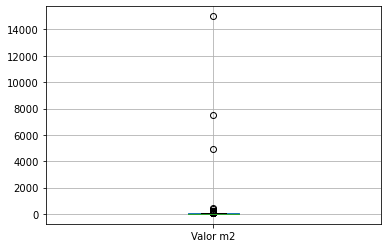

In [94]:
amostra.boxplot(['Valor m2'])

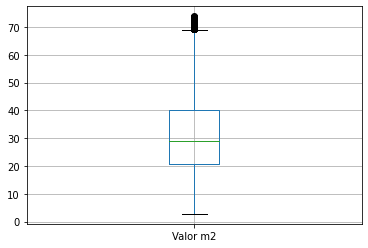

In [96]:
amostra_nova_sem_outliers.boxplot(['Valor m2'])

## Exercício final

In [98]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (15, 7))

dados = pd.read_csv('dados/aluguel_amostra.csv', sep = ';')

Text(0.5, 1.0, 'Total de Imóveis por Tipo')

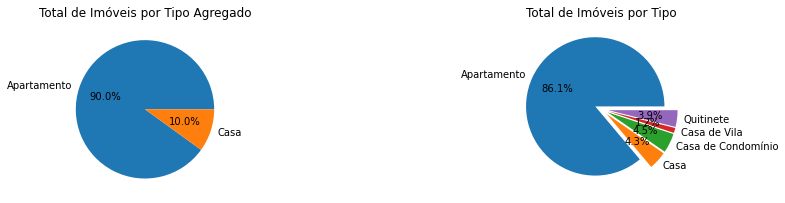

In [99]:
# opção A
#incluiu uma área de duas linhas e duas colunas para apenas dois gráficos
area = plt.figure()
g1 = area.add_subplot(2, 2, 1) #incluindo linha a mais sem valor
g2 = area.add_subplot(2, 2, 2) #incluiu linha a mais 
grupo1 = dados.groupby('Tipo Agregado')['Valor']
label = grupo1.count().index
valores = grupo1.count().values
g1.pie(valores, labels = label, autopct='%1.1f%%')
g1.set_title('Total de Imóveis por Tipo Agregado')
grupo2 = dados.groupby('Tipo')['Valor']
label = grupo2.count().index
valores = grupo2.count().values
g2.pie(valores, labels = label, autopct='%1.1f%%', explode = (.1, .1, .1, .1, .1))
g2.set_title('Total de Imóveis por Tipo')

Text(0.5, 1.0, 'Total de Imóveis por Tipo')

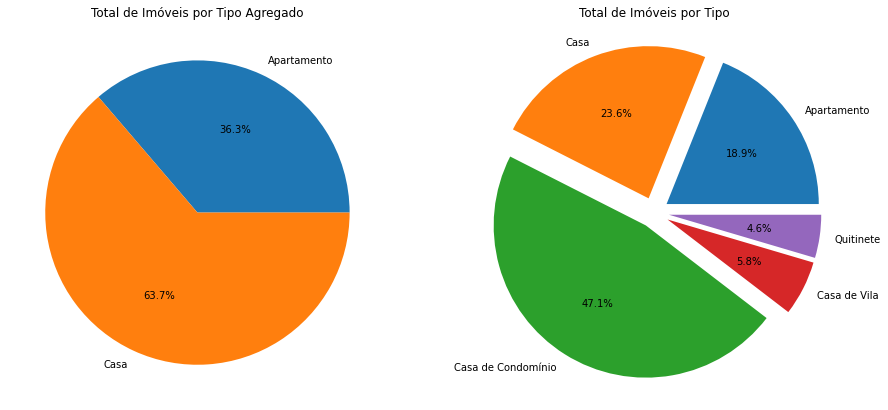

In [100]:
#opção B
#Alternativa errada! Neste caso, a função utilizada para criar as variáveis label e valores deve ser count() e não mean().
area = plt.figure()
g1 = area.add_subplot(1, 2, 1)
g2 = area.add_subplot(1, 2, 2)
grupo1 = dados.groupby('Tipo Agregado')['Valor']
label = grupo1.mean().index
valores = grupo1.mean().values
g1.pie(valores, labels = label, autopct='%1.1f%%')
g1.set_title('Total de Imóveis por Tipo Agregado')
grupo2 = dados.groupby('Tipo')['Valor']
label = grupo2.mean().index
valores = grupo2.mean().values
g2.pie(valores, labels = label, autopct='%1.1f%%', explode = (.1, .1, .1, .1, .1))
g2.set_title('Total de Imóveis por Tipo')

Text(0.5, 1.0, 'Total de Imóveis por Tipo')

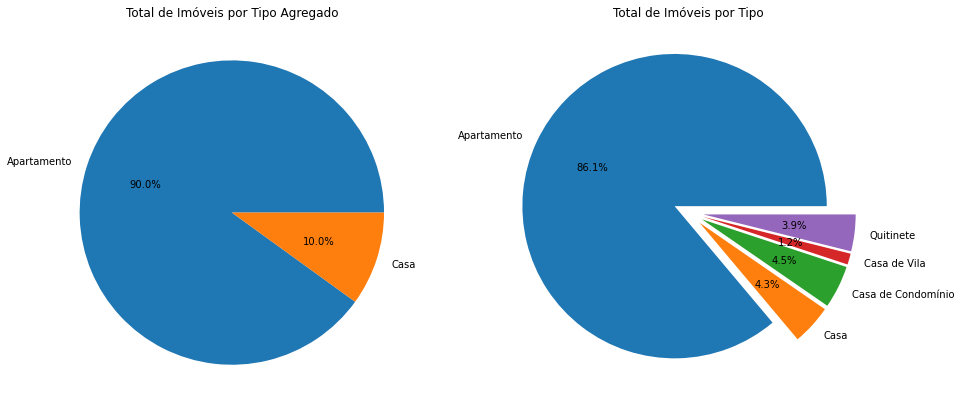

In [102]:
#opção C (correta para o exercício)
area = plt.figure()
g1 = area.add_subplot(1, 2, 1)
g2 = area.add_subplot(1, 2, 2)
grupo1 = dados.groupby('Tipo Agregado')['Valor']
label = grupo1.count().index
valores = grupo1.count().values
g1.pie(valores, labels = label, autopct='%1.1f%%')
g1.set_title('Total de Imóveis por Tipo Agregado')
grupo2 = dados.groupby('Tipo')['Valor']
label = grupo2.count().index
valores = grupo2.count().values
g2.pie(valores, labels = label, autopct='%1.1f%%', explode = (.1, .1, .1, .1, .1))
g2.set_title('Total de Imóveis por Tipo')